**Numerical Methods**

The code below should allow you to find the approximate solutions of any initial value problem of the form

$$y'(t) = f(t, y(t))$$
$$y(t_0) = y_0$$

You can modify the function f(t, y) in the cell below as well as values for t_0, y_0, T and N. To start with, we have $f(t, y) = 2y - 1$, $t_0 = 0$ and $y_0 = 1$. To run each cell, press SHIFT + ENTER or press the "Run" button somewhere above.

We implement three methods: classic Euler's, improved Euler's and Runge-Kutta and plot the estimates obtained using each method together with the exact solution.

We define the function exact in the cell below to find exact values for the solution to the IVP
$$y'(t) = 2y - 1$$
$$y(0) = 1$$
You may want to change "exact" if you change f, t_0 or y_0.

In [12]:
import numpy as np
from matplotlib import pyplot

def f(t, y):
    return 2*y - 1 ##you can modify this

#Let's get the exact solution. Note that you may want to change this if you change f, t_0 or y_0.
def exact(t):
    return (np.exp(2*t) + 1)/2

##Feel free to play around with different values of t_0, y_0, T and h

t_0 = 0
y_0 = 1 ## y(t_0) = y_0

T = 2 ##solve the equation in range [t_0, T]
N = 20 ##We want a step-size h = (T - t_0)/N. i.e. a larger value of N gives a smaller step-size

h = (T - t_0)/N

t_values = np.linspace(t_0, T, N + 1) #gives array [t_0, t_0 + h, t_0 + 2h, ..., T - h, T]

**Euler's Method**

The cell below implements Euler's method and plots the exact values of the IVP solution at $t_0, ..., t_{N+1}$ together with the Euler method approximations. If you do not want to plot the exact solution, you can comment out the second-to-last line of code below by typing "##" behind it.

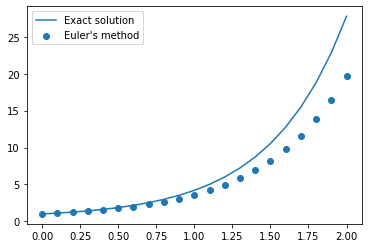

In [20]:
y_euler = np.zeros(N+1) #Holds approximate values of y(t) obtained using Euler's method
y_euler[0] = y_0

for index in range(1, N+1):
    y_euler[index] = y_euler[index - 1] + h*f(t_values[index - 1], y_euler[index - 1])

pyplot.scatter(t_values, y_euler) #let's plot!
pyplot.plot(t_values, exact(t_values)) #You can comment out this line if you do not want to plot the exact values
pyplot.legend(['Exact solution', 'Euler\'s method'])

**Improved Euler**

We have the following scheme:

$$y_{n+1} = y_n + \dfrac{(f(t_n, y_n) + f(t_n + h, \tilde y_n))}{2}h$$
where 
$$\tilde y_n = y_n + hf(t_n,  y_n)$$

Once again we plot the exact solution values together with the approximations obtained. If you do not want to plot the exact solution, you can comment out the second-to-last line of code below by typing "##" behind it.

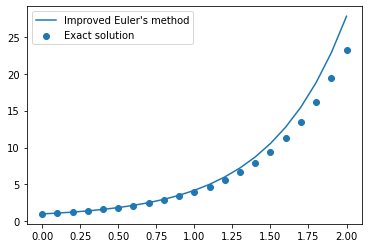

In [18]:
y_improved_euler = np.zeros(N+1) #Holds approximate values of y(t) obtained using Euler's method
y_improved_euler[0] = y_0

for index in range(1, N+1):
    y_star = y_improved_euler[index - 1] + h*f(t_values[index - 1], y_improved_euler[index - 1])
    y_improved_euler[index] = y_improved_euler[index - 1] + h*(f(t_values[index - 1], y_euler[index - 1]) + f(t_values[index], y_star))/2

pyplot.scatter(t_values, y_improved_euler) 
pyplot.plot(t_values, exact(t_values))  #You can comment out this line if you want
pyplot.legend(['Exact solution', 'Euler\'s method'])

**Runge-Kutta**

$$y_{n+1} = y_n + \dfrac{(k_{n1} + 2k_{n2} + 2k_{n3} + k_{n4})}{6}h$$

where
\begin{align*}
&k_{n1} = f(t_n, y_n)\\
&k_{n2} = f\big(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_{n1}\big)\\
&k_{n3} = f\big(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_{n2}\big)\\
&k_{n2} = f(t_n + h, y_n + hk_{n3})
\end{align*}

Note that we need to calculate the above coefficients at each step of the algorithm. If you do not want to plot the exact solution, you can comment out the second-to-last line of code below by typing "##" behind it.

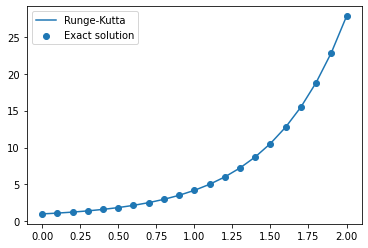

In [19]:
y_RK = np.zeros(N+1) #Holds approximate values of y(t) obtained using Euler's method
y_RK[0] = y_0

for index in range(1, N+1):
    k_1 = f(t_values[index - 1], y_RK[index - 1])
    k_2 = f(t_values[index - 1] + h/2, y_RK[index - 1] + h*k_1/2)
    k_3 = f(t_values[index - 1] + h/2, y_RK[index - 1] + h*k_2/2)
    k_4 = f(t_values[index - 1] + h  , y_RK[index - 1] + h*k_3)
    
    y_RK[index] = y_RK[index - 1] + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

pyplot.scatter(t_values, y_RK)
pyplot.plot(t_values, exact(t_values))  #You can comment out this line if you want
pyplot.legend(['Exact solution', 'Euler\'s method'])

You should observe that Runge-Kutta provided the best approximations followed by improved Euler.